<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [51]:
# type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = "ignore")


#### Read the data

Load the csv file and print the first five observations.

In [52]:
# type your code here
df = pd.read_csv("seedtype_data.csv")
df.head()

,Area,Perimeter,Kernel_len,Kernel_width,Kernelgroove_len,Type
0,12.76,13.38,5.073,3.155,4.830,0.0
1,12.13,13.73,5.394,3.745,5.220,0.0
2,14.86,14.67,NaN,3.258,5.351,0.0
3,15.69,14.75,5.527,3.514,5.046,0.0
4,19.94,16.92,6.675,3.763,6.550,1.0


**The data definition is as follows:** <br>

**Area**: Area of the wheat kernel 

**Perimeter**: Perimeter of the wheat kernel

**Kernel_len**: Length of the wheat kernel

**Kernel_width**: Width of the wheat kernel

**Kernelgroove_len**: Length of the wheat kernel groove

**Type**: Type of the wheat seed (0 = Kama Wheat, 1 = Rosa Wheat) (target/dependent variable)

Our objective is to predict whether the wheat seed is of Kama or Rosa type.

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Is there any record where no data have been reported? If yes, do the needful</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [53]:
# type your code here
s = df.isnull().sum().to_frame()
s
df["Area"] = df["Area"].fillna(df["Area"].mean())
df["Perimeter"] = df["Perimeter"].fillna(df["Perimeter"].mean())
df["Kernel_width"] = df["Kernel_width"].fillna(df["Kernel_width"].mean())
df["Kernelgroove_len"] = df["Kernelgroove_len"].fillna(df["Kernelgroove_len"].mean())
df["Type"] = df["Type"].fillna(value = 0.0)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Use the visualization technique to identify the variables with missing data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

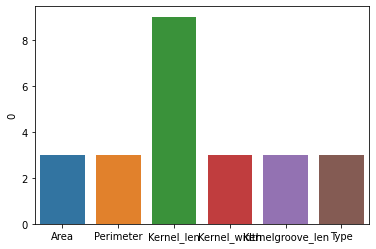

In [54]:
# type your code here
sns.barplot(x = s.index,y = s[0] )
plt.show()


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Use the appropriate technique to replace the missing data in the variable representing the length of a wheat kernel
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [55]:
# type your code here
df["Kernel_len"] = df["Kernel_len"].fillna(df["Kernel_len"].mean())

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Identify the variables containing extreme values and remove such observations, if present
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

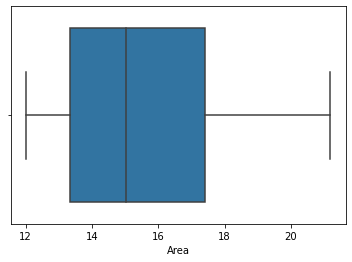

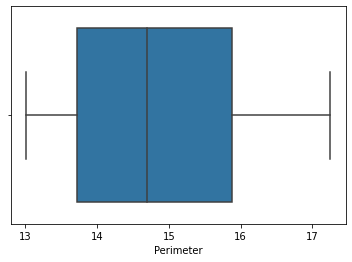

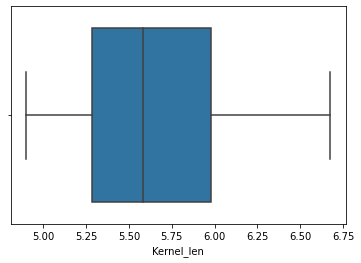

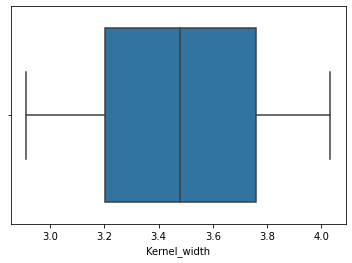

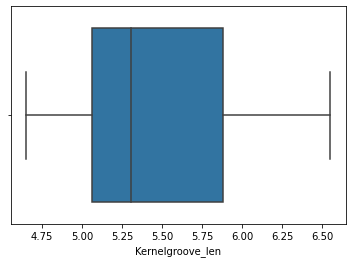

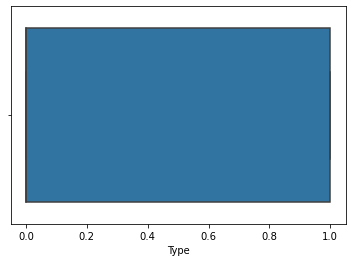

In [56]:
# type your code here
for col in df.columns:
    sns.boxplot(df[col])
    plt.show()

In [57]:
# None of the variables consist of extreme values

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Apply the gradient boosting on 80% of the data with 250 estimators each of maximum depth 2. Also, calculate the precision and sensitivity using the confusion matrix
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [58]:
# type your code here
x = df.drop("Type",axis = 1)
y = df["Type"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score,confusion_matrix,roc_auc_score,plot_roc_curve,accuracy_score,plot_confusion_matrix
gc = GradientBoostingClassifier(n_estimators=250,max_depth=2)
gc.fit(x_train,y_train)
y_pred = gc.predict(x_test)
print("precision:",precision_score(y_test,y_pred))
print("confusion_matrix")
s = confusion_matrix(y_test,y_pred)
print(s)
print("sensitivity:",s[1][1]/(s[1][1] + s[0][1]))


precision: 0.9444444444444444
confusion_matrix
[[23  1]
 [ 0 17]]
sensitivity: 0.9444444444444444


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Create 80 stumps using AdaBoost and plot the ROC curve along with the AUC score
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

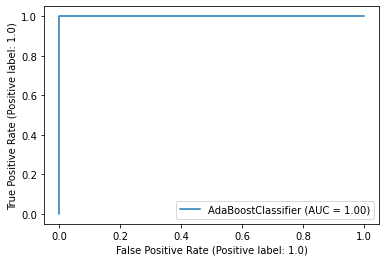

In [59]:
# type your code here
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier(n_estimators=80)
ad.fit(x_train,y_train)
y_pred = ad.predict(x_test)
plot_roc_curve(ad,x_test,y_test)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Select the optimal maximum depth from the given values for 180 base learners to build the gradient boosting classifier (consider 3-fold cross validation)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Use the given list:**

depth = [2, 3, 4, 5, 6, 7, 8]

In [60]:
# type your code here
d  = {"max_depth":[2,3,4,5,6,7,8]}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(gc,param_grid = d,cv = 3)
grid.fit(x_train,y_train)

print(grid.best_params_)

gc = GradientBoostingClassifier(n_estimators=180,max_depth=4)
gc.fit(x_train,y_train)
y_pred = gc.predict(x_test)


{'max_depth': 3}


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build the XGBoost model with a learning rate of 0.4 and gamma equal to 3. Calculate the accuracy by plotting the confusion matrix
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

[16:24:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "leaning_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:24:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy: 1.0


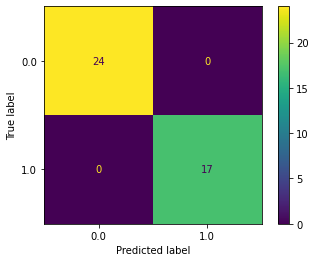

In [61]:
# type your code here
from xgboost import XGBClassifier
xb = XGBClassifier(leaning_rate = 0.4,gamma = 3)
xb.fit(x_train,y_train)
y_pred = xb.predict(x_test)
plot_confusion_matrix(xb,x_test,y_test)
print("accuracy:",accuracy_score(y_test,y_pred))

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Use the stacking technique on 70% of the data with the 9-NN and Naive Bayes model as base learners. Consider the Adaboost model as a final estimator. Also, compute the AUC score of the model </b>
                </font>
            </div>
        </td>
    </tr>
</table>

0.9664835164835165

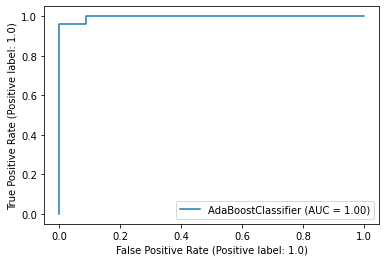

In [63]:
# type your code here
x_train_ab,x_test_ab,y_train_ab,y_test_ab = train_test_split(x,y,test_size = 0.3)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train_ab,y_train_ab)
y_pred_knn = knn.predict(x_test_ab)
from sklearn.naive_bayes import GaussianNB
nb =GaussianNB()
nb.fit(x_train_ab,y_train_ab)
y_preds_nb = (x_test)
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(base_estimator=nb)
ab.fit(x_train_ab,y_train_ab)
y_pred_ab = ab.predict(x_test_ab)
plot_roc_curve(ab,x_test_ab,y_test_ab)
from sklearn.metrics import plot_confusion_matrix,roc_auc_score
ab_score = roc_auc_score(y_pred_ab,y_test_ab)
ab_score


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Use the base learners in Q9 and build a stacking model with the XGBoost as final estimator. Compute the AUC score of the model and compare it with the result of Q9 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

[16:29:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


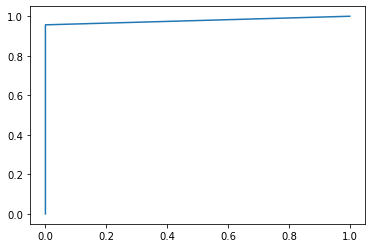

In [70]:
# type your code here
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

from sklearn.metrics import plot_confusion_matrix,roc_auc_score,roc_curve
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(x_train,y_train)
y_pred = xg.predict(x_test)
roc_auc_score(y_test,y_pred)
xg_score = roc_auc_score(y_test,y_pred)
xg_score
tpr,fpr,thres = roc_curve(y_test,y_pred)
plt.plot(tpr,fpr)

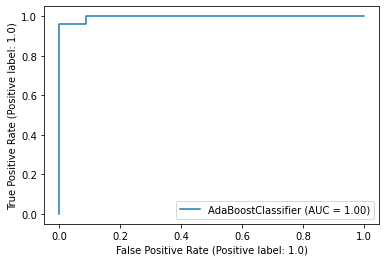

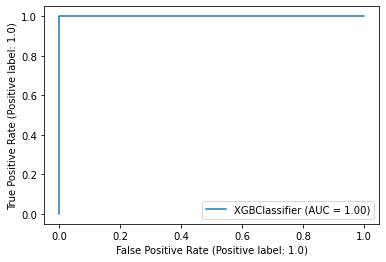

In [64]:
plot_roc_curve(ab,x_test_ab,y_test_ab)
plot_roc_curve(xg,x_test,y_test)

In [77]:
# XG boost is slightly better than adaboost